1. **Анализ исторических данных**:
   - Вычислить **скользящее среднее** температуры с окном в 30 дней для сглаживания краткосрочных колебаний.
   - Рассчитать среднюю температуру и стандартное отклонение для каждого сезона в каждом городе.
   - Выявить аномалии, где температура выходит за пределы $ \text{среднее} \pm 2\sigma $.
   - Попробуйте распараллелить проведение этого анализа. Сравните скорость выполнения анализа с распараллеливанием и без него.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('temperature_data.csv')

In [16]:
temp_stats = df.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_stats

,city,season,mean,std
0,Beijing,autumn,15.970586,5.094180
1,Beijing,spring,13.257928,5.123946
2,Beijing,summer,26.924297,4.869008
3,Beijing,winter,-1.915226,4.841281
4,Berlin,autumn,11.072154,4.950883
5,Berlin,spring,10.134989,5.273188
6,Berlin,summer,20.159398,4.965222
7,Berlin,winter,-0.151309,5.171888
8,Cairo,autumn,24.978171,5.248590
9,Cairo,spring,24.974398,4.899601


In [17]:
df

,city,timestamp,temperature,season
0,New York,2010-01-01,2.698231,winter
1,New York,2010-01-02,-3.013115,winter
2,New York,2010-01-03,2.312977,winter
3,New York,2010-01-04,-7.713789,winter
4,New York,2010-01-05,-6.443300,winter
...,...,...,...,...
54745,Mexico City,2019-12-25,7.305941,winter
54746,Mexico City,2019-12-26,13.430101,winter
54747,Mexico City,2019-12-27,10.381540,winter
54748,Mexico City,2019-12-28,13.424945,winter


In [18]:
df['date'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df = df.drop(columns=['timestamp'])

Вычислить **скользящее среднее** температуры с окном в 30 дней для сглаживания краткосрочных колебаний

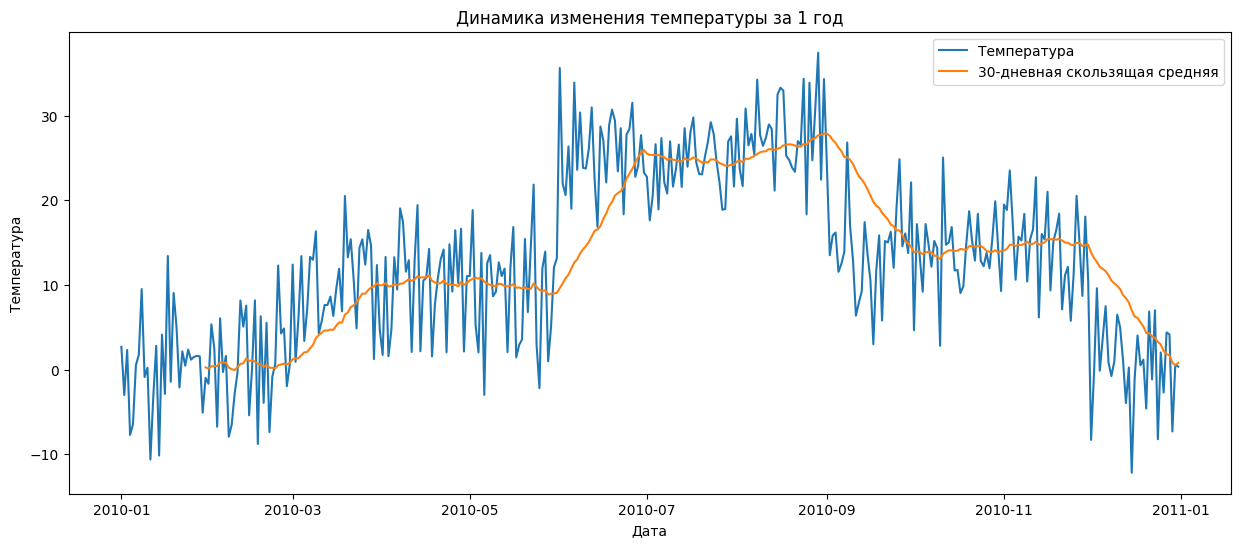

In [19]:
df['rolling_mean'] = df['temperature'].rolling(window=30).mean()

filtered_df = df.iloc[:365]
plt.figure(figsize=(15, 6)) 
plt.plot(filtered_df['date'], filtered_df["temperature"], label="Температура")
plt.plot(filtered_df['date'], filtered_df["rolling_mean"], label="30-дневная скользящая средняя")
plt.title("Динамика изменения температуры за 1 год") 
plt.xlabel("Дата")
plt.ylabel("Температура") 
plt.legend() 
plt.show()

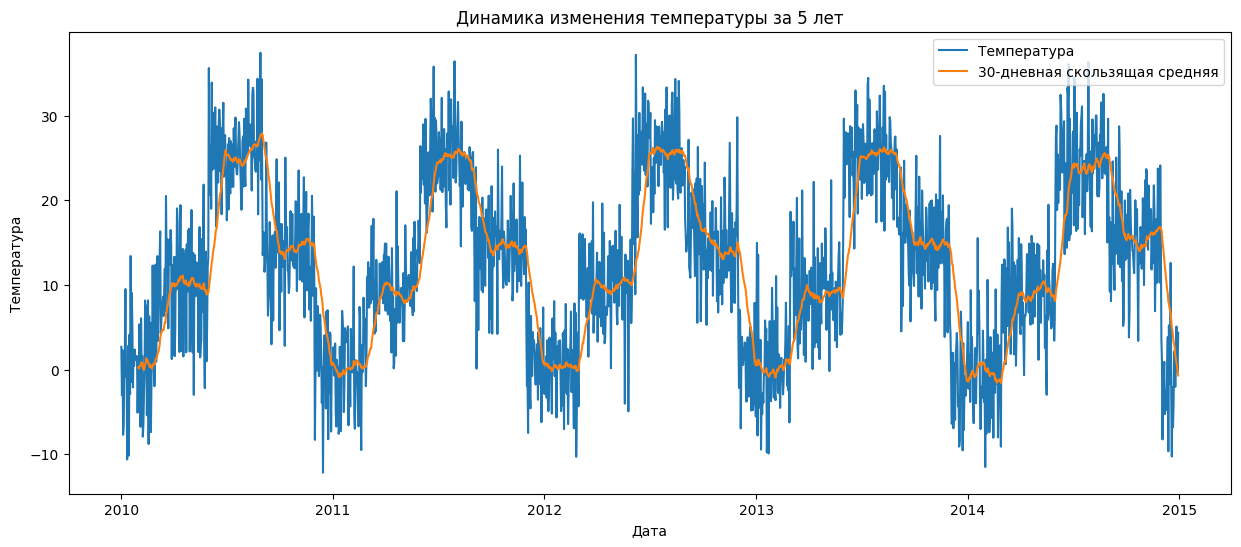

In [20]:
df['rolling_mean'] = df['temperature'].rolling(window=30).mean()

filtered_df = df.iloc[:365*5]
plt.figure(figsize=(15, 6)) 
plt.plot(filtered_df['date'], filtered_df["temperature"], label="Температура")
plt.plot(filtered_df['date'], filtered_df["rolling_mean"], label="30-дневная скользящая средняя")
plt.title("Динамика изменения температуры за 5 лет") 
plt.xlabel("Дата")
plt.ylabel("Температура") 
plt.legend() 
plt.show()

Рассчитать среднюю температуру и стандартное отклонение для каждого сезона в каждом городе.

In [55]:
temp_stats = df.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_stats

,city,season,mean,std
0,Beijing,autumn,15.970586,5.094180
1,Beijing,spring,13.257928,5.123946
2,Beijing,summer,26.924297,4.869008
3,Beijing,winter,-1.915226,4.841281
4,Berlin,autumn,11.072154,4.950883
5,Berlin,spring,10.134989,5.273188
6,Berlin,summer,20.159398,4.965222
7,Berlin,winter,-0.151309,5.171888
8,Cairo,autumn,24.978171,5.248590
9,Cairo,spring,24.974398,4.899601


Выявить аномалии, где температура выходит за пределы $ \text{среднее} \pm 2\sigma $ по всем записям

In [22]:
lower = df['temperature'].mean() - 2 * df['temperature'].std()
upper = df['temperature'].mean() + 2 * df['temperature'].std()
anomalies = df[(df['temperature'] < lower) | (df['temperature'] > upper)]
print("Аномалии по всем записям:")
anomalies

Аномалии по всем записям:


,city,temperature,season,date,rolling_mean
3,New York,-7.713789,winter,2010-01-04,NaN
4,New York,-6.443300,winter,2010-01-05,NaN
10,New York,-10.617671,winter,2010-01-11,NaN
13,New York,-10.151737,winter,2010-01-14,NaN
28,New York,-5.087779,winter,2010-01-29,NaN
...,...,...,...,...,...
50941,Cairo,40.434721,summer,2019-07-24,35.779165
50943,Cairo,40.601379,summer,2019-07-26,35.582984
50953,Cairo,42.973221,summer,2019-08-05,34.551685
51078,Cairo,-3.974760,winter,2019-12-08,21.888307


Выявить аномалии, где температура выходит за пределы $ \text{среднее} \pm 2\sigma $ по городам и сезонам

In [53]:
import pandas as pd

df = pd.read_csv('temperature_data.csv')

In [56]:
df = df.merge(temp_stats, on=['city', 'season'], how='left')
df['lower'] = df['mean'] - 2 * df['std']
df['upper'] = df['mean'] + 2 * df['std']
anomalies = df[(df['temperature'] < df['lower']) | (df['temperature'] > df['upper'])]
print("Аномалии по городам и сезонам:")
anomalies

Аномалии по городам и сезонам:


,city,timestamp,temperature,season,mean,std,lower,upper
10,New York,2010-01-11,-10.617671,winter,0.110707,4.851247,-9.591787,9.813201
13,New York,2010-01-14,-10.151737,winter,0.110707,4.851247,-9.591787,9.813201
16,New York,2010-01-17,13.417999,winter,0.110707,4.851247,-9.591787,9.813201
54,New York,2010-02-24,12.297273,winter,0.110707,4.851247,-9.591787,9.813201
77,New York,2010-03-19,20.508303,spring,9.665067,4.917237,-0.169407,19.499540
...,...,...,...,...,...,...,...,...
54591,Mexico City,2019-07-24,6.283595,summer,19.965910,4.839531,10.286849,29.644971
54657,Mexico City,2019-09-28,2.655069,autumn,15.080200,5.060949,4.958302,25.202099
54677,Mexico City,2019-10-18,4.827728,autumn,15.080200,5.060949,4.958302,25.202099
54683,Mexico City,2019-10-24,4.418951,autumn,15.080200,5.060949,4.958302,25.202099


Попробуйте распараллелить проведение этого анализа. Сравните скорость выполнения анализа с распараллеливанием и без него.

## Попытки распараллелить до того, как увидел описание в тг

Анализ без распараллеливания

In [24]:
import time


temp_df = df.drop(columns=['mean', 'std', 'lower', 'upper']).copy()

start_time = time.time()
temp_df['rolling_mean'] = temp_df['temperature'].rolling(window=30).mean()
temp_stats = temp_df.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df = pd.merge(temp_df, temp_stats, on=['city', 'season'], how='left')
temp_df['lower'] = temp_df['mean'] - 2 * temp_df['std']
temp_df['upper'] = temp_df['mean'] + 2 * temp_df['std']
anomalies = temp_df[(temp_df['temperature'] < temp_df['lower']) | (temp_df['temperature'] > temp_df['upper'])]
end_time = time.time()

print(f"Время выполнения без распараллеливания: {(end_time - start_time)*1000:.4f} миллисекунд")

Время выполнения без распараллеливания: 27.4670 миллисекунд


In [25]:
import dask.dataframe as dd

temp_df_dask = dd.from_pandas(df, npartitions=4)
temp_df_dask = temp_df_dask.drop(columns=['mean', 'std', 'lower', 'upper']).copy()


start_time_parallel = time.time()
temp_df_dask['rolling_mean'] = temp_df_dask['temperature'].rolling(window=30).mean()
temp_stats_dask = temp_df_dask.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df_dask = temp_df_dask.merge(temp_stats_dask, on=['city', 'season'], how='left')
temp_df_dask['lower'] = temp_df_dask['mean'] - 2 * temp_df_dask['std']
temp_df_dask['upper'] = temp_df_dask['mean'] + 2 * temp_df_dask['std']
anomalies = temp_df_dask[(temp_df_dask['temperature'] < temp_df_dask['lower']) | (temp_df_dask['temperature'] > temp_df_dask['upper'])]
anomalies = anomalies.compute()
end_time_parallel = time.time()

print(f"Время выполнения с распараллеливанием: {(end_time_parallel - start_time_parallel)*1000:.4f} миллисекунд")

Время выполнения с распараллеливанием: 239.2178 миллисекунд


In [26]:
import dask.dataframe as dd

temp_df = temp_df.drop(columns=['mean', 'std', 'lower', 'upper']).copy()
temp_df_dask = dd.from_pandas(temp_df, npartitions=4)

start_time_parallel = time.time()
temp_df_dask['rolling_mean'] = temp_df_dask['temperature'].rolling(window=30).mean()
temp_stats = temp_df_dask.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df_dask = dd.merge(temp_df_dask, temp_stats, on=['city', 'season'], how='left')
temp_df_dask['lower'] = temp_df_dask['mean'] - 2 * temp_df_dask['std']
temp_df_dask['upper'] = temp_df_dask['mean'] + 2 * temp_df_dask['std']
anomalies = temp_df_dask[(temp_df_dask['temperature'] < temp_df_dask['lower']) | (temp_df_dask['temperature'] > temp_df_dask['upper'])]
anomalies = anomalies.compute()

end_time_parallel = time.time()

print(f"Время выполнения с распараллеливанием: {(end_time_parallel - start_time_parallel)*1000:.4f} миллисекунд")

Время выполнения с распараллеливанием: 71.2190 миллисекунд


Теперь попробуем увеличить кол-во записей в 1000 раз

In [27]:
import numpy as np

temp_df = df.drop(columns=['mean', 'std', 'lower', 'upper']).copy()
temp_df = pd.concat([temp_df] * 1000, ignore_index=True)
np.random.seed(0)
temp_df['temperature'] = temp_df['temperature'] + np.random.normal(0, 5, temp_df.shape[0])
temp_df.to_csv('big_file.csv')

In [28]:
start_time = time.time()
temp_df['rolling_mean'] = temp_df['temperature'].rolling(window=30).mean()
temp_stats = temp_df.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df = pd.merge(temp_df, temp_stats, on=['city', 'season'], how='left')
temp_df['lower'] = temp_df['mean'] - 2 * temp_df['std']
temp_df['upper'] = temp_df['mean'] + 2 * temp_df['std']
anomalies = temp_df[(temp_df['temperature'] < temp_df['lower']) | (temp_df['temperature'] > temp_df['upper'])]
end_time = time.time()

print(f"Время выполнения без распараллеливания: {(end_time - start_time):.4f} cекунд")

Время выполнения без распараллеливания: 12.6310 cекунд


In [29]:
temp_df = temp_df.drop(columns=['mean', 'std', 'lower', 'upper']).copy()

In [30]:
temp_df_dask = dd.from_pandas(temp_df, npartitions=4)

start_time_parallel = time.time()
temp_df_dask['rolling_mean'] = temp_df_dask['temperature'].rolling(window=30).mean()
temp_stats = temp_df_dask.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
temp_df_dask = temp_df_dask.merge(temp_stats, on=['city', 'season'], how='left')
temp_df_dask['lower'] = temp_df_dask['mean'] - 2 * temp_df_dask['std']
temp_df_dask['upper'] = temp_df_dask['mean'] + 2 * temp_df_dask['std']
anomalies = temp_df_dask[(temp_df_dask['temperature'] < temp_df_dask['lower']) | (temp_df_dask['temperature'] > temp_df_dask['upper'])]
anomalies = anomalies.compute()
end_time_parallel = time.time()

print(f"Время выполнения с распараллеливанием: {(end_time_parallel - start_time_parallel):.4f} секунд")

Время выполнения с распараллеливанием: 8.1630 секунд


Первые итоги по распараллеливанию:

С помощью распараллеливания удалось увеличить скорость обработки около 30% (11 vs 7.6 cекунд), при обработке 54 млн строк.

## После того, как увидел описание в тг

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed

# Функция для анализа данных по одному городу
def analyze_city_data(city_data):
    city = city_data['city'].iloc[0]
    
    # 1.1: Скользящее среднее и стандартное отклонение
    city_data['rolling_mean'] = city_data['temperature'].rolling(window=30).mean()
    city_data['rolling_std'] = city_data['temperature'].rolling(window=30).std()

    # 1.2: Вычисление mean и std по сезону
    season_stats = city_data.groupby('season')['temperature'].agg(['mean', 'std']).reset_index()

    # 1.3: Поиск тренда через линейную регрессию
    X = np.arange(len(city_data)).reshape(-1, 1)
    y = city_data['temperature'].values
    reg = LinearRegression().fit(X, y)
    trend_slope = reg.coef_[0]  # Коэффициент регрессии

    # 1.4: Средняя, минимальная и максимальная температура
    avg_temp = city_data['temperature'].mean()
    min_temp = city_data['temperature'].min()
    max_temp = city_data['temperature'].max()

    # 1.5: Аномалии на основе скользящего среднего и std
    anomalies = city_data[(city_data['temperature'] < city_data['rolling_mean'] - 2 * city_data['rolling_std']) |
                          (city_data['temperature'] > city_data['rolling_mean'] + 2 * city_data['rolling_std'])]

    # Возвращаем результаты для города
    return {
        'city': city,
        'avg_temp': avg_temp,
        'min_temp': min_temp,
        'max_temp': max_temp,
        'season_profile': season_stats,
        'rolling_mean_std': city_data[['date', 'temperature', 'rolling_mean', 'rolling_std']],
        'trend_slope': trend_slope,
        'anomalies': anomalies
    }

def analyze_all_cities(df):
    city_groups = [group for _, group in df.groupby('city')]
    
    results = []
    for group in city_groups:
        result = analyze_city_data(group)
        results.append(result)
    return results


def analyze_all_cities_parallel(df, n_jobs=4):
    city_groups = [group for _, group in df.groupby('city')]
    results = Parallel(n_jobs=n_jobs)(delayed(analyze_city_data)(group) for group in city_groups)
    
    return results

In [32]:
df = pd.read_csv('big_file.csv')

In [33]:
start_time = time.time()
results = analyze_all_cities(df)
end_time = time.time()

print(f"Время выполнения без распараллеливания: {(end_time - start_time)*1000:.4f} миллисекунд")

Время выполнения без распараллеливания: 9397.2380 миллисекунд


In [34]:
start_time_parallel = time.time()
results = analyze_all_cities_parallel(df, 10)
end_time_parallel = time.time()

print(f"Время выполнения с распараллеливанием: {(end_time_parallel - start_time_parallel)*1000:.4f} миллисекунд")

Время выполнения с распараллеливанием: 19041.2133 миллисекунд


Итоги по распараллеливанию:

С помощью распараллеливания не удалось увеличить скорость обработки.

2. **Мониторинг текущей температуры**:
   - Подключить OpenWeatherMap API для получения текущей температуры города. Для получения API Key (бесплатно) надо зарегистрироваться на сайте. Обратите внимание, что API Key может активироваться только через 2-3 часа, это нормально. Посему получите ключ заранее.
   - Получить текущую температуру для выбранного города через OpenWeatherMap API.
   - Определить, является ли текущая температура нормальной, исходя из исторических данных для текущего сезона.
   - Данные на самом деле не совсем реальные (сюрпрайз). Поэтому на момент эксперимента погода в Берлине, Каире и Дубае была в рамках нормы, а в Пекине и Москве аномальная. Протестируйте свое решение для разных городов.
   - Попробуйте для получения текущей температуры использовать синхронные и асинхронные методы. Что здесь лучше использовать?

Подключить OpenWeatherMap API для получения текущей температуры города.

In [35]:
with open('private_info/weather_api', 'r') as file:
    API_KEY = file.readline().strip()

In [36]:
import requests
import datetime

def get_season(response_dt):
    date_time = datetime.datetime.fromtimestamp(response_dt, tz=datetime.timezone.utc)
    month = date_time.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'
    
def get_cur_weather(API_KEY, city, lang='RU', units='metric') -> tuple[float, int]:
    lat_lon_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={API_KEY}'
    lat_lon_res = requests.get(lat_lon_url)
    if lat_lon_res.status_code != 200:
        raise Exception(lat_lon_res.text)

    elif not lat_lon_res.json():
        raise Exception("Город не найден")

    lat = lat_lon_res.json()[0]['lat']
    lon = lat_lon_res.json()[0]['lon']

    # 3.0 не работает без привязки платежных средств
    # url = f'https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude=current&appid={API_KEY}'
    url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}&lang={lang}&units={units}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        cur_temp = data['main']['temp']
        response_season = get_season(data['dt'])
        return cur_temp, response_season
    else:
        raise Exception(response.text)

In [37]:
cur_moscow_temp, response_season = get_cur_weather(API_KEY, 'Moscow')
print(cur_moscow_temp, response_season)

-1.78 winter


Пример ошибочного запроса

In [38]:
# cur_moscow_temp, response_season = get_cur_weather(None, 'Moscow')
# print(cur_moscow_temp, response_season)

Exception: {"cod":401, "message": "Invalid API key. Please see https://openweathermap.org/faq#error401 for more info."}

In [39]:
df = pd.read_csv('temperature_data.csv')

In [40]:
def check_norm_city_temp(city, df, season_str, cur_temp):
    city_data = df[df['city'] == city]
    season_stats = city_data.groupby(['city', 'season'])['temperature'].agg(['mean', 'std']).reset_index()
    season_mean = season_stats[season_stats['season'] == season_str]['mean'].values[0]
    season_std = season_stats[season_stats['season'] == season_str]['std'].values[0]
    lower = season_mean - 2 * season_std
    upper = season_mean + 2 * season_std
    if lower <= cur_temp <= upper:
        print(f"Текущая температура {cur_temp}°C для города {city} нормальная для сезона {season_str}.")
    else:
        print(f"Текущая температура {cur_temp}°C для города {city} аномальная для сезона {season_str}.")

In [41]:
check_norm_city_temp('Moscow', df, response_season, cur_moscow_temp)

Текущая температура -1.78°C для города Moscow нормальная для сезона winter.


In [42]:
df['city'].unique()

array(['New York', 'London', 'Paris', 'Tokyo', 'Moscow', 'Sydney',
       'Berlin', 'Beijing', 'Rio de Janeiro', 'Dubai', 'Los Angeles',
       'Singapore', 'Mumbai', 'Cairo', 'Mexico City'], dtype=object)

In [43]:
start_sync_time = time.time()
for city in df['city'].unique():
    cur_temp, response_season = get_cur_weather(API_KEY, city)
    check_norm_city_temp(city, df, response_season, cur_temp)
end_sync_time = time.time()
print(f'Время синхронной обработки запросов: {(end_sync_time - start_sync_time):.4f} секунд')

Текущая температура -8.27°C для города New York нормальная для сезона winter.
Текущая температура 5.86°C для города London нормальная для сезона winter.
Текущая температура 7.6°C для города Paris нормальная для сезона winter.
Текущая температура 4.29°C для города Tokyo нормальная для сезона winter.
Текущая температура -1.78°C для города Moscow нормальная для сезона winter.
Текущая температура 23.66°C для города Sydney аномальная для сезона winter.
Текущая температура 5.79°C для города Berlin нормальная для сезона winter.
Текущая температура -4.06°C для города Beijing нормальная для сезона winter.
Текущая температура 25.94°C для города Rio de Janeiro нормальная для сезона winter.
Текущая температура 23.02°C для города Dubai нормальная для сезона winter.
Текущая температура 11.79°C для города Los Angeles нормальная для сезона winter.
Текущая температура 28.42°C для города Singapore нормальная для сезона winter.
Текущая температура 24.31°C для города Mumbai нормальная для сезона winter.
Т

In [ ]:
import aiohttp
import asyncio


async def get_lat_lon(city, API_KEY, session):
    lat_lon_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={API_KEY}'
    async with session.get(lat_lon_url, timeout=10) as lat_lon_res:
        if lat_lon_res.status != 200:
            raise Exception(lat_lon_res.text)
        data = await lat_lon_res.json()
        if not data:
            raise Exception("Город не найден")
        lat = data[0]['lat']
        lon = data[0]['lon']
        return lat, lon
        
async def get_weather(lat, lon, API_KEY, session):
    url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}&units=metric'
    async with session.get(url, timeout=10) as response:
        if response.status != 200:
            raise Exception(response.text)
        data = await response.json()
        cur_temp = data['main']['temp']
        response_season = get_season(data['dt'])
        return cur_temp, response_season

async def get_async_weather(city, df, API_KEY, session):
    lat, lon = await get_lat_lon(city, API_KEY, session)
    cur_temp, season_str = await get_weather(lat, lon, API_KEY, session)
    check_norm_city_temp(city, df, season_str, cur_temp)

async def check_weather_async(API_KEY, df):
    cities = df['city'].unique()
    async with aiohttp.ClientSession() as session:
        tasks = [get_async_weather(city, df, API_KEY, session) for city in cities]
        await asyncio.gather(*tasks)


df = pd.read_csv('temperature_data.csv')

start_async_time = time.time()
await check_weather_async(API_KEY, df)
end_async_time = time.time()
print(f'Время aсинхронной обработки запросов: {(end_async_time - start_async_time):.4f} секунд')


Текущая температура 24.31°C для города Mumbai нормальная для сезона winter.
Текущая температура -1.77°C для города Moscow нормальная для сезона winter.
Текущая температура 5.93°C для города London нормальная для сезона winter.
Текущая температура 23.02°C для города Dubai нормальная для сезона winter.
Текущая температура 28.41°C для города Singapore нормальная для сезона winter.
Текущая температура 23.59°C для города Sydney аномальная для сезона winter.
Текущая температура 4.29°C для города Tokyo нормальная для сезона winter.
Текущая температура 25.94°C для города Rio de Janeiro нормальная для сезона winter.
Текущая температура 5.77°C для города Berlin нормальная для сезона winter.
Текущая температура 11.61°C для города Mexico City нормальная для сезона winter.
Текущая температура 7.77°C для города Paris нормальная для сезона winter.
Текущая температура 11.87°C для города Los Angeles нормальная для сезона winter.
Текущая температура 21.33°C для города Cairo нормальная для сезона winter.

Пример ошибки

In [ ]:
# await check_weather_async(None)
# print(cur_moscow_temp, response_season)

Exception: <bound method ClientResponse.text of <ClientResponse(http://api.openweathermap.org/geo/1.0/direct?q=Singapore&limit=1&appid=None) [401 Unauthorized]>
<CIMultiDictProxy('Server': 'openresty', 'Date': 'Sun, 22 Dec 2024 11:50:55 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '108', 'Connection': 'keep-alive', 'X-Cache-Key': '/geo/1.0/direct?limit=1&q=singapore', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Methods': 'GET, POST')>
>

### Итоги:
Асинхронный вызов сервисов в данном случае позволил повысить скорость обработки в 10 раз (с 9 сек. до 0.9 сек)